## Парадокс времени ожидания автобуса

Зададим период времени Т (в минутах) и средний интервал движения (15 минут). Смоделируем случайные приходы автобусов на интервале (0, T)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T = 100*24*60
tau = 15

arr = T * np.random.rand(T // tau)
arr = np.sort(arr)

График считающего процесса. По горизонтали - время, по вертикали - количество пришедших автобусов (показан начальный кусок процесса)

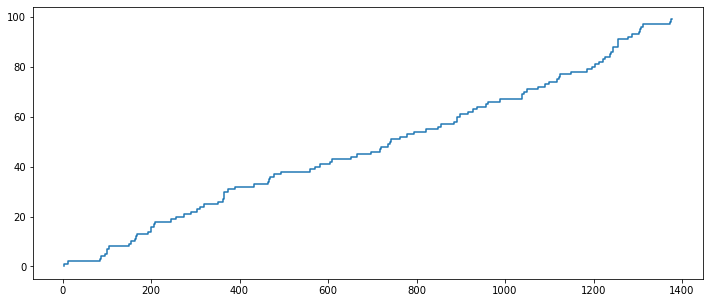

In [2]:
plt.figure(figsize=(12, 5))
m = 100
plt.step(arr[:m], np.arange(len(arr))[:m])
plt.show()

Средний интервал между приходами автобусов

In [3]:
np.diff(arr).mean()

15.001076692578389

Сравнение гистограммы интервалов между автобусами и показательного распределения $Exp(-\lambda)$. Совпадение? не думаю...

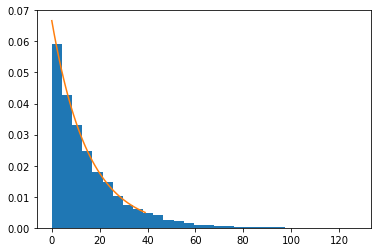

In [4]:
plt.hist(np.diff(arr), density=True, bins=30)
plt.plot(np.exp(-np.arange(40)/tau)/tau)
plt.show()

Моделируем приход пассажиров в случайные моменты времени

In [5]:
psg = np.sort(np.random.rand(100000)) * max(arr)

Находим номер автобус, на который сядет пассажир

In [6]:
ind = np.searchsorted(arr, psg, side='right')

Вычисляем время ожидания и находим среднее

In [7]:
wait = arr[ind] - psg
np.mean(wait)

14.993099850595339

Время ожидания почти совпало со средним интервалом движения. Тем самым, в какой бы момент ни прийти на остановку, нужно приготовиться ждать полных 15 минут. К счастью, когда расписание все же соблюдается, мы можем рассчитывать быстрее сесть на автобус. При строгом соблюдении расписания среднее время ожидания будет вдвое меньшим.

In [8]:
ind_prev = ind - 1

In [9]:
psg2 = arr[ind] - psg

In [10]:
psg1 = psg - arr[ind_prev]

In [11]:
result = []
for i in range(0, 100):
    result.append(psg2[np.where(psg1>=i)].mean())

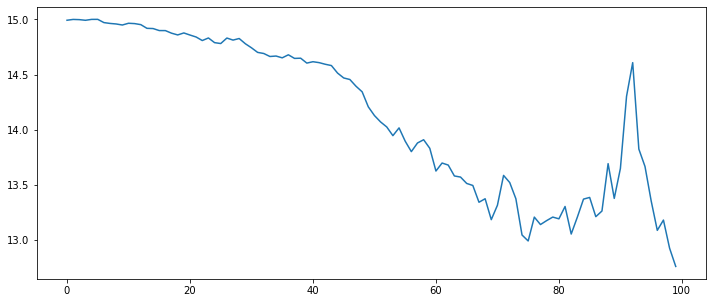

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(0, 100), result)
plt.show()